# Changing Seasonality

In [10]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [11]:
df = pd.read_csv('../Data/airline_passengers.csv')

In [12]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [13]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

Sometime growth in trend or changes in seasonality is either additive or multiplicative. We are going to explore that here.

Imagine we are satisfied with prophet's performance with train-test split, we will fit prophet on the entire data

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


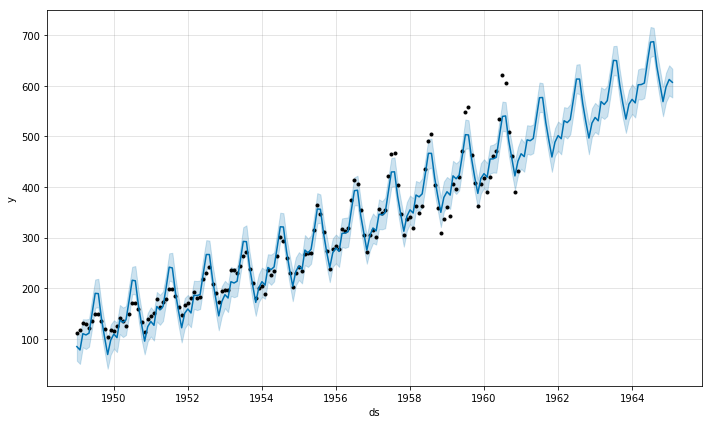

In [14]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

This time series has a clear yearly cycle, but the seasonality in the forecast is too large at the start of the time series and too small at the end. In this time series, the seasonality is not a constant additive factor as assumed by Prophet, rather it grows with the trend. This is multiplicative seasonality.

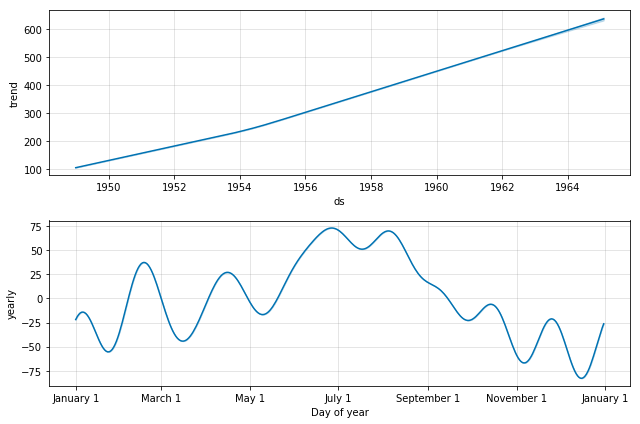

In [15]:
fig = m.plot_components(forecast)

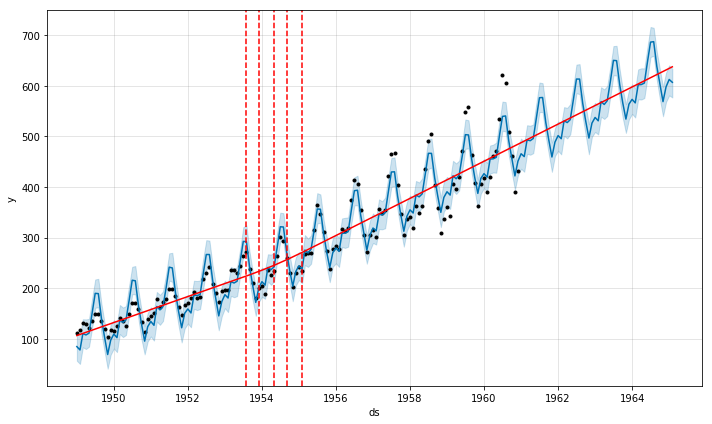

In [16]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### Change to Multiplicative 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


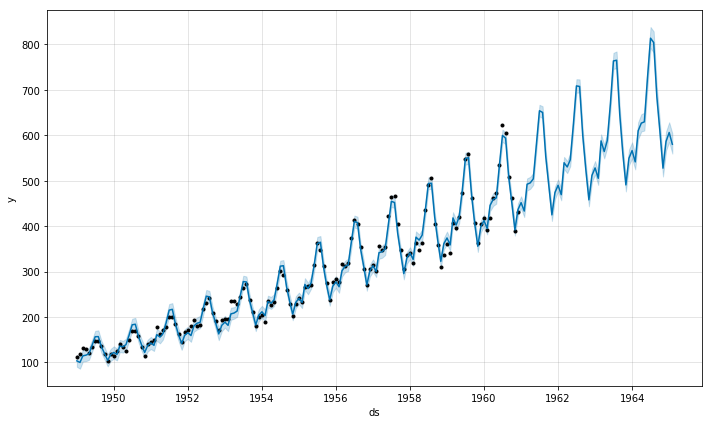

In [17]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)

Multiplicative fits better we see lesser upper and lower bound range. 

### For building a real world project we can try both additive and multiplicative on train and evaluate on test, whichever gives better result, we can make it final model. And then train on full data with the best model and predict on future x number of months/days.

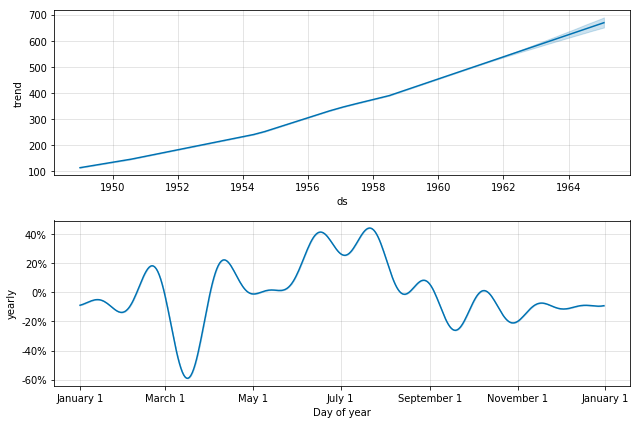

In [20]:
fig = m.plot_components(forecast)

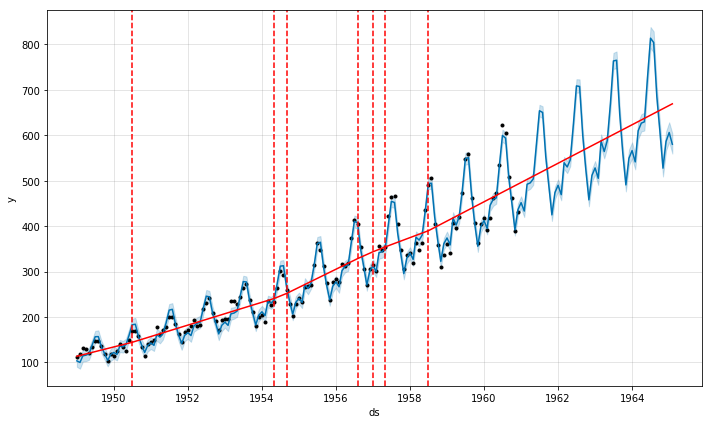

In [21]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

Change points in seasonality.